# Dealing with Cosmological Models

``hmf`` uses the robust ``astropy`` cosmology framework to deal with cosmological models. This provides a range of cosmographic functionality for free. 

Cosmological models are the most basic ``Framework`` within ``hmf``. Every other ``Framework`` depends on it. So knowing how to specify the models is important (but very simple!).

In [7]:
from hmf import cosmo
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Default Settings

Like everything in ``hmf``, the ``Cosmology`` framework has all parameters specified with defaults. In this case, there are only two parameters -- a base cosmological model, and a dictionary of cosmological parameters with which to alter it. By default, the cosmological model is a Flat LambdaCDM model infused with the Planck15 parameters. The dictionary is empty, so we don't modify anything:

In [2]:
my_cosmo = cosmo.Cosmology()

The intrinsic ``astropy`` object is found as the ``cosmo`` attribute of the class we just created. Beware, there is also a ``cosmo_model`` attribute, which should only be treated as a parameter, never used in calculations. It has not been supplemented with any custom parameters. We can check out the parameters defined within the model:

In [6]:
print "Matter density: ", my_cosmo.cosmo.Om0
print "Hubble constant: ", my_cosmo.cosmo.H0
print "Dark Energy density: ", my_cosmo.cosmo.Ode0
print "Baryon density: ",  my_cosmo.cosmo.Ob0
print "Curvature density: ", my_cosmo.cosmo.Ok0

Matter density:  0.3075
Hubble constant:  67.74 km / (Mpc s)
Dark Energy density:  0.691009934459
Baryon density:  0.0486
Curvature density:  0.0


Or we can check out some cosmographic quantities, like the comoving distance as a function of redshift:

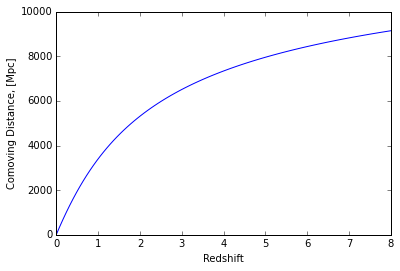

In [9]:
z = np.linspace(0,8,100)
plt.plot(z,my_cosmo.cosmo.comoving_distance(z))
plt.ylabel("Comoving Distance, [Mpc]")
plt.xlabel("Redshift")

## Passing a cosmological model

The ``cosmo`` module contains several pre-made instances of cosmologies which might be useful, which we can input as our default model: 

In [11]:
my_cosmo = cosmo.Cosmology(cosmo_model=cosmo.WMAP5)

print "WMAP5 baryon density: ", my_cosmo.cosmo.Ob0

WMAP5 baryon density:  0.0459


Alternatively, we can create our own. The ``astropy`` package contains the basic tools to do this. To create a standard Flat LambdaCDM cosmology:

In [13]:
from astropy.cosmology import FlatLambdaCDM
new_model = FlatLambdaCDM(H0 = 75.0, Om0=0.4, Tcmb0 = 5.0, Ob0 = 0.3)

This new model can be used as input to the ``Cosmology`` class:

In [15]:
my_cosmo = cosmo.Cosmology(cosmo_model = new_model)
print "Crazy cosmology baryon density: ", my_cosmo.cosmo.Ob0

Crazy cosmology baryon density:  0.3


The ``cosmo_model`` needn't be a Flat LambdaCDM. It can be any subclass of FLRW. Thus we could use a non-flat model:

In [18]:
from astropy.cosmology import LambdaCDM
new_model = LambdaCDM(H0 = 75.0, Om0=0.4, Tcmb0 = 0.0, Ob0 = 0.3, Ode0=0.4)

my_cosmo = cosmo.Cosmology(cosmo_model = new_model)
print "Crazy cosmology curvature density: ", my_cosmo.cosmo.Ok0

Crazy cosmology curvature density:  0.2


## Passing custom parameters

Instead of passing a pre-made cosmological model, you can pass custom parameters for the default model. This is passed as a dictionary, in which each entry is a valid parameter for the model that has been passed (i.e., if the model is a FlatLambdaCDM, you can't pass ``Ode0``!). This means you can specify the cosmology you want typically in one line, rather than a few. It also means that parameters can be updated in a standard way, so that iterating over parameters, in applications such as fitting models, becomes simple.

When passing the dictionary of parameters, you don't need to specify them all, just whichever ones you want to modify:

In [19]:
my_cosmo = cosmo.Cosmology(cosmo_params={"Om0":0.2})
print "Custom cosmology matter density: ", my_cosmo.cosmo.Om0

Custom cosmology matter density:  0.2


New parameters are available for extended cosmological models:

In [20]:
my_cosmo = cosmo.Cosmology(new_model,{"Om0":0.2,"Ode0":0.0,"Ob0":0.2})
print "Custom cosmology curvature density: ", my_cosmo.cosmo.Ok0

Custom cosmology curvature density:  0.8


## Updating parameters

One of the great things about ``hmf`` Frameworks is that any parameter can be updated without re-creating the entire object. This is also true of the ``Cosmology`` class.

Any parameter passed to the constructor may also be updated:

In [21]:
my_cosmo = cosmo.Cosmology(new_model)
my_cosmo.update(cosmo_params={"Om0":0.2,"Ode0":0.0,"Ob0":0.2})
print "Custom cosmology curvature density: ", my_cosmo.cosmo.Ok0

Custom cosmology curvature density:  0.8


The parameter dictionary is persistent, so that updating a different parameter doesn't affect the others:

In [23]:
my_cosmo.update(cosmo_params={"H0":10.0})
print "Custom cosmology curvature density: ", my_cosmo.cosmo.Ok0
print "Custom parameters: ", my_cosmo.cosmo_params

Custom cosmology curvature density:  0.8
Custom parameters:  {'H0': 10.0, 'Om0': 0.2, 'Ode0': 0.0, 'Ob0': 0.2}


Of course, if we were to update the model to a Flat Lambda CDM model, then the ``Ode0`` keyword would give an error. To facilitate this, passing an empty dictionary clears all custom values:

In [24]:
my_cosmo.update(cosmo_model=cosmo.Planck13,cosmo_params={})
print "Flat cosmology curvature density: ", my_cosmo.cosmo.Ok0

Flat cosmology curvature density:  0.0


In effect, this gives us an easy way to track changes induced by a cosmological variable:

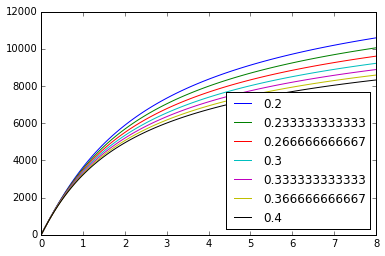

In [25]:
for Om0 in np.linspace(0.2,0.4,7):
    my_cosmo.update(cosmo_params={"Om0":Om0})
    plt.plot(z,my_cosmo.cosmo.comoving_distance(z),label="%s"%Om0)
_ = plt.legend(loc=0)